In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
#import nxviz as nv

In [2]:
features = pd.read_csv('Output Data/features_with_weights.csv')
nodes_coords = pd.read_csv('Output Data/nodes_and_coords.csv')

In [13]:
features

,STREET1ID,STREET2ID,ST1NAME,ST2NAME,STREET1SEGID,STREET2SEGID,NODEID,LATITUDE,LONGITUDE,STREETSEGID,...,ADDDATE,RESOLUTIONDATE,ZIPCODE,WARD_Y,NUMBER_LIGHTS,SOURCEID,BIKELANELENGTH,FACILITY,SHAPE_LENGTH,total_weight
0,104777,100180,I,18TH,12795,398,14923,38.901337,-77.041698,SEGID-8703,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,20
1,104777,100180,I,18TH,12795,398,14923,38.901337,-77.041698,SEGID-8703,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,20
2,104777,100180,I,18TH,12795,398,14923,38.901337,-77.041698,SEGID-12795,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,19
3,100180,104777,18TH,I,8703,5073,14923,38.901337,-77.041698,SEGID-8703,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,20
4,100180,104777,18TH,I,8703,5073,14923,38.901337,-77.041698,SEGID-8703,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,20
5,100180,104777,18TH,I,8703,5073,14923,38.901337,-77.041698,SEGID-12795,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,19
6,100180,104244,18TH,H,398,3624,14922,38.900211,-77.041700,SEGID-398,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,19
7,100180,104244,18TH,H,398,3624,14922,38.900211,-77.041700,SEGID-3624,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,19
8,104244,100180,H,18TH,3624,398,14922,38.900211,-77.041700,SEGID-398,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,19
9,104244,100180,H,18TH,3624,398,14922,38.900211,-77.041700,SEGID-3624,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,19


In [4]:
nodes_coords.head()

,NODEID,FROMNODEID,TONODEID,LATITUDE,LONGITUDE
0,14923,14923.0,18548.0,38.901337,-77.041698
1,14923,14923.0,18548.0,38.901337,-77.041698
2,14923,14923.0,14771.0,38.901337,-77.041698
3,14923,14923.0,18548.0,38.901337,-77.041698
4,14923,14923.0,18548.0,38.901337,-77.041698


In [9]:
list(J.nodes)

[14923.0,
 18548.0,
 14771.0,
 14922.0,
 16233.0,
 19852.0,
 17799.0,
 14446.0,
 17414.0,
 17804.0,
 16172.0,
 17711.0]

In [6]:
nodes_coords = nodes_coords.drop_duplicates()
nodes_coords.reset_index(drop=True, inplace=True)

In [7]:
nodes_coords

,NODEID,FROMNODEID,TONODEID,LATITUDE,LONGITUDE
0,14923,14923.0,18548.0,38.901337,-77.041698
1,14923,14923.0,14771.0,38.901337,-77.041698
2,14922,14922.0,14923.0,38.900211,-77.041700
3,14922,14922.0,16233.0,38.900211,-77.041700
4,19852,19852.0,17799.0,38.900208,-77.039448
5,19852,19852.0,14922.0,38.900208,-77.039448
6,17799,17799.0,14446.0,38.901340,-77.039447
7,17799,17799.0,14923.0,38.901340,-77.039447
8,14923,14922.0,14923.0,38.901337,-77.041698
9,14923,17799.0,14923.0,38.901337,-77.041698


In [8]:
J = nx.from_pandas_edgelist(nodes_coords, source='FROMNODEID', target='TONODEID')

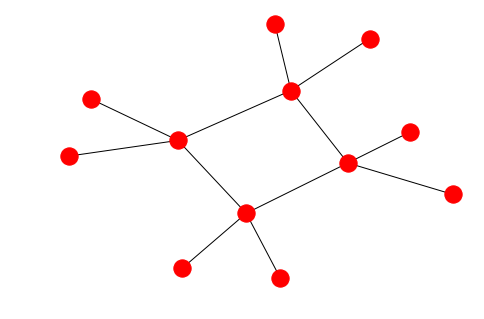

In [12]:
nx.draw(J)
plt.show()

In [ ]:
J.add_weighted_edges_from()

In [145]:
# Me trying to use a dictionary of nodes with coordinates to set a fixed position of networkx graph
# - to no avail so far
#--------------------------------------------------------------------------------------------------

# nx.draw(J)
# plt.show()

# from_node = list(nodes_coords['FROMNODEID'])
# to_node = list(nodes_coords['TONODEID'])

# lat = list(nodes_coords['LATITUDE'])
# long = list(nodes_coords['LONGITUDE'])

# positions = {from_node[0]:(lat[0], long[0]),
#              from_node[1]:(lat[1], long[1]),
#              from_node[2]:(lat[2], long[2]),
#              from_node[3]:(lat[3], long[3]),
             
#              from_node[4]:(lat[4], long[4]),
#              from_node[5]:(lat[5], long[5]),
#              from_node[6]:(lat[6], long[6]),
#              from_node[7]:(lat[7], long[7]),
             
#              from_node[8]:(lat[8], long[8]),
#              from_node[9]:(lat[9], long[9]),
#              from_node[10]:(lat[10], long[10]),
#              from_node[11]:(lat[11], long[11]),
             
#              from_node[12]:(lat[12], long[12]),
#              from_node[13]:(lat[13], long[13]),
#              from_node[14]:(lat[14], long[14]),
#              from_node[15]:(lat[15], long[15]),
                   
#              to_node[0]:(lat[0], long[0]),
#              to_node[1]:(lat[1], long[1]),
#              to_node[2]:(lat[2], long[2]),
#              to_node[3]:(lat[3], long[3]),
             
#              to_node[4]:(lat[4], long[4]),
#              to_node[5]:(lat[5], long[5]),
#              to_node[6]:(lat[6], long[6]),
#              to_node[7]:(lat[7], long[7]),
             
#              to_node[8]:(lat[8], long[8]),
#              to_node[9]:(lat[9], long[9]),
#              to_node[10]:(lat[10], long[10]),
#              to_node[11]:(lat[11], long[11]),
             
#              to_node[12]:(lat[12], long[12]),
#              to_node[13]:(lat[13], long[13]),
#              to_node[14]:(lat[14], long[14]),
#              to_node[15]:(lat[15], long[15])
             
#             }

In [143]:
# {from_node[15]:(lat[15], long[15])}

In [142]:
# positions

In [141]:
# fig = plt.figure(figsize=(10,10))
# ax1 = fig.add_subplot(121)

# nx.draw_networkx(J, pos=positions, with_labels=False, ax=ax1)
# plt.show()